In [3]:
'''排除nan跟outliers'''
import random
import torch
from torch import nn, optim
import math
from IPython import display
import numpy as np

filename = "ML_ift+relax+796.csv"     # print(data)
data = np.genfromtxt(filename, delimiter = ',', dtype = None, skip_header = 0, usecols = range(3,9,1), encoding = 'UTF-8')     #, usecols = [7,15,37,38,53]
[Row,Column] = data.shape     # 確認data(?)...print(data.shape); print(data); print(type(data[1,0]))
err_Chrtime = [119, 934, 1062, 1341, 1354, 1467, 1858, 2097, 2220, 2227, 2243, 2479, 3376, 3484, 3485, 3750, 4294, 4375, 4383, 4873, 5324, 5766, 6918, 6935, 7119, 7611, 8363, 8955, 9120, 9515, 10055, 10083, 10177, 10191, 10342, 10390, 11527, 12168, 12849, 13317, 13557, 13853, 14121, 14222, 14618, 16676, 17079, 18105, 18193, 18584, 18626, 18814, 19038, 19107, 19287, 19527, 19663, 19669, 20254, 20742, 21440, 21614, 21719, 21804, 21961, 21963, 23175, 23348, 23948, 24152, 24388, 24397, 24410, 25981, 26001] 
err_3mrelax = [rex for rex, rexx in enumerate(data[:,1]) if rexx>-0.01]     # =[[119, 1062, 1341, 1467, 1858, 2220, 2227, 2243, 2479, 2900, 3484, 3485, 3750, 3823, 4375, 4383, 5324, 5766, 6935, 7119, 8363, 8955, 9120, 10083, 10177, 10191, 11527, 12849, 13557, 13853, 14222, 14618, 17079, 18193, 18584, 18626, 18814, 19038, 19107, 19287, 19527, 19663, 19669, 20254, 20742, 21614, 21719, 21804, 21963, 22906, 23175, 23348, 23948, 24397, 24410, 25981, 26001]
err_inf2500 = [ift for ift, iftt in enumerate(data[:,2]) if iftt == 2500 or iftt == 0]
err_vot_nan = np.argwhere(np.isnan(data[:,3:6]));     # print("err_vot_nan = ", err_vot_nan); print(err_vot_nan.shape); print(type(err_vot_nan[0]))
err_all_nan = []
for i in range(len(err_vot_nan)):
    errfornan = err_vot_nan[i][0].astype(np.int64)
    err_all_nan.append(errfornan)     # print("err_all_nan = ",err_all_nan); print(len(err_all_nan))
err_VPVD = [vpv for vpv, vpvp in enumerate(data[:,5]) if vpvp == 0]
print(len(err_VPVD))
err = sorted(set(err_Chrtime+err_3mrelax+err_inf2500+err_all_nan+err_VPVD))     # err_V15_nan+err_VPVD_nan；# print("err = \n", err)
print("removed amounts = ", len(err))
data_ok = np.delete(data[:,:], err, axis=0).astype(np.float32);     # print(data_ok)；why這一次要加axis=0才能正常輸出??
print(data_ok)
np.savetxt(r'C:\Users\Chun-Po\Documents\Python Scripts\數據_機器學習\ML_noerror.csv',data_ok,fmt='%s',delimiter=',')
## 原本是被移除2394個data
## 調整vpvd後只移除1517個


69
removed amounts =  1517
[[ 1.0000e+02 -2.3300e-01  1.1700e+03  8.0069e+00  1.5000e+03  8.7500e+00]
 [ 1.0000e+02 -2.1400e-01  1.2300e+03  7.9929e+00  1.7100e+03  8.6700e+00]
 [ 1.0000e+02 -2.3300e-01  7.9600e+02  8.0034e+00  1.5700e+03  8.7300e+00]
 ...
 [ 6.8200e+01 -2.9100e-01  5.0600e+02  8.3629e+00  9.4000e+02  8.8400e+00]
 [ 8.3100e+01 -2.6700e-01  8.0200e+02  8.1095e+00  1.2800e+03  8.7700e+00]
 [ 9.2100e+01 -2.2500e-01  8.9600e+02  8.1248e+00  1.3500e+03  8.7300e+00]]


[100.  100.  100.  ...  68.2  83.1  92.1]


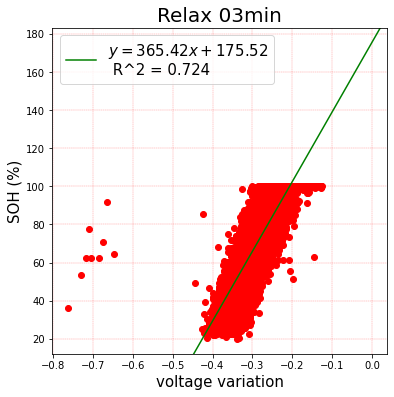

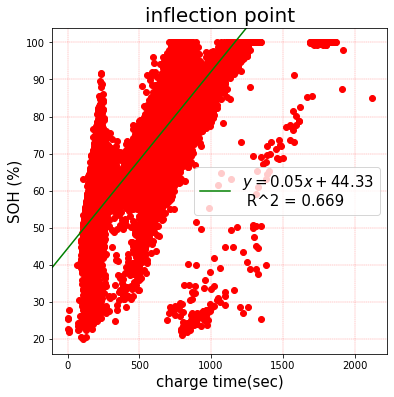

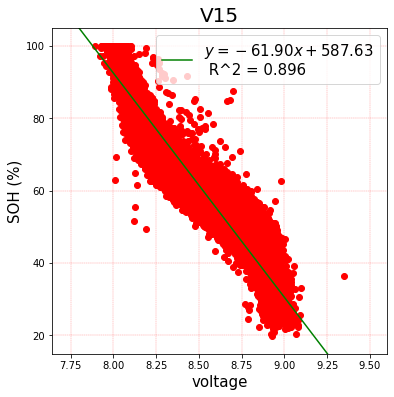

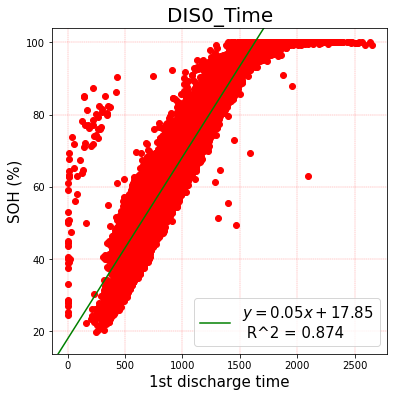

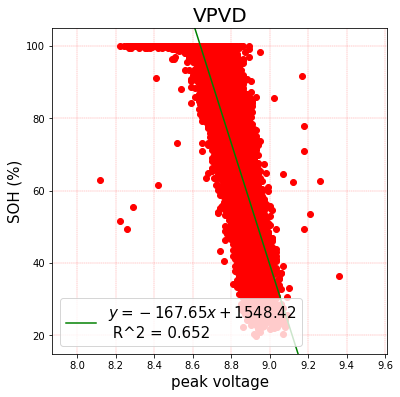

In [3]:
import numpy as np
import matplotlib.pyplot as plt

filename = "ML_noerror.csv"     # print(data), usecols = range(1,8,1),
data = np.genfromtxt(filename, delimiter = ',', dtype = None, skip_header = 0, encoding = 'UTF-8')     #, usecols = [7,15,37,38,53]
print(data[:,0])     # type(data[0])
title = ['Relax 03min','inflection point','V15','DIS0_Time','VPVD']
xterm = ['voltage variation','charge time(sec)','voltage','1st discharge time','peak voltage']
R_noerr = [];
for i in range(1,6,1):
    R = np.corrcoef(data[:,0],data[:,i])[0,1];
    R_sq = np.round(R*R,3)
    R_noerr.append(R_sq)
  # 以下畫圖
    plt.figure(figsize=(6,6))
    plt.plot(data[:,i],data[:,0],'ro');
    m1, b1 = np.polyfit(data[:,i],data[:,0], 1);
    plt.axline(xy1=(0, b1), slope=m1, color='g', label=f'$y = {m1:.2f}x {b1:+.2f}$\n R^2 = {R_sq}')
    plt.xlabel(xterm[i-1], fontsize=15)
    plt.ylabel("SOH (%)", fontsize=15)
    plt.title(title[i-1], fontsize=20);
    if i in range(3,7,2):
        plt.xlim(min(data[:,i])-0.25,max(data[:,i])+0.25);
        plt.ylim(min(data[:,0])-5,max(data[:,0])+5);
    plt.grid(color='r', linestyle='-.', linewidth=0.2)
    plt.legend(fontsize=15); plt.show()
# print("R^2 of every feature=",R_noerr)
